<a href="https://colab.research.google.com/github/Arush0113/ArushTensorflowRepo/blob/main/Deep_into_CNN_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [73]:
df = pd.read_csv('/content/drive/MyDrive/diabetes2.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [74]:
df['Glucose'] = df['Glucose']/df['Glucose'].mean()
df['BloodPressure'] = df['BloodPressure']/df['BloodPressure'].mean()
df['SkinThickness'] = df['SkinThickness']/df['SkinThickness'].mean()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,1.224208,1.041886,1.704286,0,33.6,0.627,50,1
1,1,0.703092,0.955062,1.412123,0,26.6,0.351,31,0
2,8,1.513716,0.926121,0.000000,0,23.3,0.672,32,1
3,1,0.736179,0.955062,1.119959,94,28.1,0.167,21,0
4,0,1.133219,0.578825,1.704286,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,0.835439,1.099768,2.337307,180,32.9,0.171,63,0
764,2,1.009144,1.012944,1.314735,0,36.8,0.340,27,0
765,5,1.000872,1.041886,1.119959,112,26.2,0.245,30,0
766,1,1.042231,0.868238,0.000000,0,30.1,0.349,47,1


In [75]:
# df.columns = [column for column in df.columns if column != 'Outcome']
# df.drop('Outcome', axis = 1, inplace=True)
# df
# x = np.concatenate(x, axis = 0)
# np.length(x)

In [76]:
data_array = df.to_numpy()
len(data_array)

768

In [77]:
training_data = data_array[0:int(0.8 * len(data_array))]
test_data = data_array[int(0.8 * len(data_array)):len(data_array)]

print(training_data)
print(test_data)

[[ 6.          1.22420757  1.0418857  ...  0.627      50.
   1.        ]
 [ 1.          0.70309218  0.9550619  ...  0.351      31.
   0.        ]
 [ 8.          1.51371611  0.92612063 ...  0.672      32.
   1.        ]
 ...
 [ 3.          1.43927106  0.83929682 ...  0.593      36.
   1.        ]
 [ 7.          1.38964102  1.27341586 ...  0.787      40.
   1.        ]
 [ 6.          0.86852564  1.15765078 ...  0.878      26.
   0.        ]]
[[11.          1.14149084  1.07082697 ...  0.557      50.
   1.        ]
 [ 3.          0.87679731  1.0418857  ...  0.207      27.
   0.        ]
 [ 6.          0.96778571  1.38918094 ...  0.157      30.
   0.        ]
 ...
 [ 5.          1.0008724   1.0418857  ...  0.245      30.
   0.        ]
 [ 1.          1.04223077  0.86823809 ...  0.349      47.
   1.        ]
 [ 1.          0.76926557  1.01294444 ...  0.315      23.
   0.        ]]


In [78]:
training_features = training_data[:,0:-1]
training_labels = training_data[:,-1]
test_features = test_data[:,0:-1]
test_labels = test_data[:,-1]

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([Dense(1, activation = 'sigmoid')])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.002), loss='binary_crossentropy', metrics = ['accuracy'])
history = model.fit(x = training_features, y = training_labels, epochs=500, verbose=1)

Epoch 1/500
20/20 [==============================] - 0s 1ms/step - loss: 7.5826 - accuracy: 0.5855
Epoch 2/500
20/20 [==============================] - 0s 926us/step - loss: 7.6396 - accuracy: 0.5712
Epoch 3/500
20/20 [==============================] - 0s 968us/step - loss: 6.1745 - accuracy: 0.5435
Epoch 4/500
20/20 [==============================] - 0s 970us/step - loss: 4.6626 - accuracy: 0.5653
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 3.8456 - accuracy: 0.5480
Epoch 6/500
20/20 [==============================] - 0s 979us/step - loss: 2.8361 - accuracy: 0.4975
Epoch 7/500
20/20 [==============================] - 0s 941us/step - loss: 2.0168 - accuracy: 0.4916
Epoch 8/500
20/20 [==============================] - 0s 1ms/step - loss: 1.3103 - accuracy: 0.5588
Epoch 9/500
20/20 [==============================] - 0s 978us/step - loss: 1.2505 - accuracy: 0.5250
Epoch 10/500
20/20 [==============================] - 0s 1ms/step - loss: 1.1954 - accuracy: 0.54

Text(0, 0.5, 'Training Accuracy')

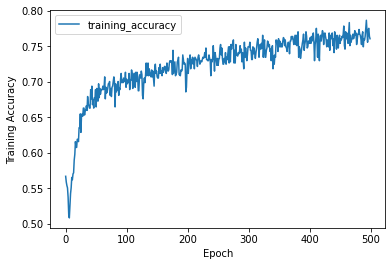

In [96]:
import matplotlib.pyplot as plt


plt.plot(history.epoch, history.history['accuracy'], label = 'training_accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')

Text(0, 0.5, 'Training Loss')

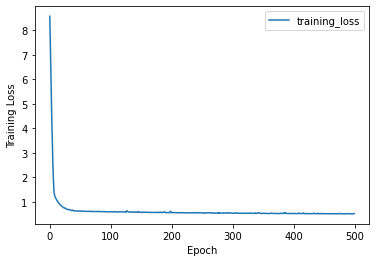

In [97]:
plt.plot(history.epoch, history.history['loss'], label = 'training_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Training Loss')

In [98]:
model.evaluate(test_features, test_labels)

5/5 [==============================] - 0s 3ms/step - loss: 0.5191 - accuracy: 0.7273


[0.5191381573677063, 0.7272727489471436]